In [1]:
#importing Libraries
import numpy as np
import pandas as pd

In [2]:
OR = pd.read_excel('/content/Company X - Order Report.xlsx')#reading data

In [3]:
OR['OrderQty']= OR['Order Qty']#removing space from column name
OR.drop(columns=  'Order Qty' , axis =0,inplace = True)

In [4]:
Pincode = pd.read_excel('/content/Company X - Pincode Zones.xlsx')

In [5]:
SKU = pd.read_excel('/content/Company X - SKU Master.xlsx')

In [6]:
SKU

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120
...,...,...
61,8904223819505,210
62,8904223819499,210
63,8904223819512,210
64,8904223819543,300


In [7]:
SKU['Weight'] = round((SKU['Weight (g)']/1000),2) #changing weight to KG

In [8]:
SKU.drop(columns = 'Weight (g)',axis = 1 , inplace = True)

In [9]:
X = pd.merge(left=OR , right=SKU , on ='SKU') # joining 2 datasets

In [10]:
X['TotalW(asperX)'] = X['OrderQty']*X['Weight']

In [11]:
CCI = pd.read_excel('/content/Courier Company - Invoice.xlsx')
CCI #Courier Company Invoice

,AWBCode,OrderID,ChargedWeight,WarehousePincode,CustomerPincode,Zone,TypeofShipment,BillingAmount
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4
...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0


In [12]:
Weight=X.groupby('ExternOrderNo')['TotalW(asperX)'].sum()
Weight = Weight.reset_index() # grouping orderno to get total weight

In [13]:
Weight

,ExternOrderNo,TotalW(asperX)
0,2001806210,0.22
1,2001806226,0.48
2,2001806229,0.50
3,2001806232,1.32
4,2001806233,0.25
...,...,...
119,2001821995,0.48
120,2001822466,1.36
121,2001823564,0.66
122,2001825261,1.55


In [14]:
CCI=pd.merge(left=CCI , right = Weight , left_on = 'OrderID',right_on = 'ExternOrderNo')
#Merging data to add total weight as per X column

In [15]:
CCI = CCI.drop('ExternOrderNo',axis =1)

In [16]:
CCI

,AWBCode,OrderID,ChargedWeight,WarehousePincode,CustomerPincode,Zone,TypeofShipment,BillingAmount,TotalW(asperX)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.32
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.62
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.24
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.70
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.24
...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2,0.50
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7,0.61
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,0.51
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,0.69


In [17]:
dictodzone = dict(Pincode.drop(columns='Warehouse Pincode',axis = 1).values) #making dictionary of pincode

In [18]:
CCI['zone(asperX)'] = CCI['CustomerPincode'].map(dictodzone) # setting zone as per pincode

In [19]:
CCI

,AWBCode,OrderID,ChargedWeight,WarehousePincode,CustomerPincode,Zone,TypeofShipment,BillingAmount,TotalW(asperX),zone(asperX)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.32,d
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.62,d
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.24,d
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.70,b
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.24,d
...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2,0.50,b
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7,0.61,b
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,0.51,b
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,0.69,e


In [23]:
import math
#Function to calculate charger according to zone and totalweight as per X
def charger(data):
  charge =0
  if data['zone(asperX)']== 'a':
    if data['TypeofShipment'] == 'Forward charges':
      charge = 29.5 + (math.floor((data['TotalW(asperX)']/0.25)))*(23.6)
    elif data['TypeofShipment'] == 'Forward and RTO charges':
      charge = 29.5 + 13.6 + (math.floor((data['TotalW(asperX)']/0.25)))*(23.6) + (math.floor((data['TotalW(asperX)']/0.25)))*(23.6)

  elif data['zone(asperX)']== 'b':
    if data['TypeofShipment'] == 'Forward charges':
      charge = 33 + (math.floor((data['TotalW(asperX)']/0.5)))*(28.3)
    elif data['TypeofShipment'] == 'Forward and RTO charges':
      charge = 33 + 20.5+ (math.floor((data['TotalW(asperX)']/0.5)))*(28.3) + (math.floor((data['TotalW(asperX)']/0.5)))*(28.3)

  elif data['zone(asperX)']== 'c':
    if data['TypeofShipment'] == 'Forward charges':
      charge = 40.1 + (math.floor((data['TotalW(asperX)']/0.75)))*(38.9)
    elif data['TypeofShipment'] == 'Forward and RTO charges':
      charge = 40.1 + 31.9+ (math.floor((data['TotalW(asperX)']/0.75)))*(38.9) + (math.floor((data['TotalW(asperX)']/0.75)))*(38.9)    
  
  elif data['zone(asperX)']== 'd':
    if data['TypeofShipment'] == 'Forward charges':
      charge = 45.4 + (math.floor((data['TotalW(asperX)']/1.25)))*(44.8)
    elif data['TypeofShipment'] == 'Forward and RTO charges':
      charge = 45.4 + 41.3 + (math.floor((data['TotalW(asperX)']/1.25)))*(44.8) + (math.floor((data['TotalW(asperX)']/1.25)))*(44.8)

  elif data['zone(asperX)']== 'e':
    if data['TypeofShipment'] == 'Forward charges':
      charge = 56.6 + (math.floor((data['TotalW(asperX)']/1.5)))*(55.5)
    elif data['TypeofShipment'] == 'Forward and RTO charges':
      charge = 56.6 + 50.7+ (math.floor((data['TotalW(asperX)']/1.5)))*(55.5) + (math.floor((data['TotalW(asperX)']/1.5)))*(55.5)

  return charge

In [25]:
a=[] # empty list
for i in range(CCI.shape[0]):
  a.append(charger(CCI.iloc[i])) #filing list with chargers

In [27]:
len(a)

124

In [28]:
CCI['Charge(asperX)'] = a # assigning list

In [29]:
CCI

,AWBCode,OrderID,ChargedWeight,WarehousePincode,CustomerPincode,Zone,TypeofShipment,BillingAmount,TotalW(asperX),zone(asperX),Charge(asperX)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.32,d,90.2
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.62,d,45.4
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.24,d,90.2
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.70,b,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.24,d,45.4
...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2,0.50,b,61.3
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7,0.61,b,110.1
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,0.51,b,61.3
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,0.69,e,56.6


In [30]:
import matplotlib.pyplot as plt


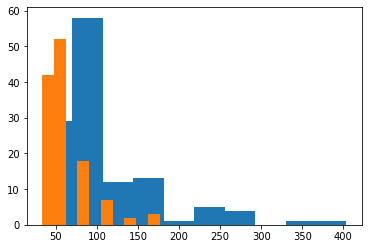

In [34]:
plt.hist(x='BillingAmount',data=CCI)
plt.hist(x='Charge(asperX)',data=CCI)
plt.show() # histogram of charges as per Courier company and charges as per X

In [35]:
CCI['Differnce']= CCI['BillingAmount']-CCI['Charge(asperX)'] # difference b/w our prices

In [36]:
CCI

,AWBCode,OrderID,ChargedWeight,WarehousePincode,CustomerPincode,Zone,TypeofShipment,BillingAmount,TotalW(asperX),zone(asperX),Charge(asperX),Differnce
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.32,d,90.2,44.8
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.62,d,45.4,44.8
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.24,d,90.2,134.4
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.70,b,61.3,0.0
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.24,d,45.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2,0.50,b,61.3,28.9
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7,0.61,b,110.1,-23.4
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,0.51,b,61.3,-15.9
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,0.69,e,56.6,-23.6


In [38]:
CCI.Differnce.sum() # total difference

5634.500000000001

In [39]:
dict2 = {'a':0.25, 'b':0.5, 'c':0.75, 'd':1.25, 'e':1.5} # dictionary to connect zone and weight slab

In [40]:
CCI['WSlab(asperX)'] = CCI['zone(asperX)'].map(dict2) # weight slab as per X

In [41]:
CCI['Wslab(asperCC)'] = CCI['Zone'].map(dict2) # weight slab as per Courier company

In [42]:
CCI # final dataset

,AWBCode,OrderID,ChargedWeight,WarehousePincode,CustomerPincode,Zone,TypeofShipment,BillingAmount,TotalW(asperX),zone(asperX),Charge(asperX),Differnce,WSlab(asperX),Wslab(asperCC)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.32,d,90.2,44.8,1.25,1.25
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,0.62,d,45.4,44.8,1.25,1.25
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.24,d,90.2,134.4,1.25,1.25
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,0.70,b,61.3,0.0,0.50,0.50
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.24,d,45.4,0.0,1.25,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2,0.50,b,61.3,28.9,0.50,1.25
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7,0.61,b,110.1,-23.4,0.50,1.25
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,0.51,b,61.3,-15.9,0.50,1.25
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,0.69,e,56.6,-23.6,1.50,0.50


In [43]:
CCI.to_excel('/content/Company X - Order Report.xlsx',index=False)